In [2]:
import pandas as pd

df = pd.read_csv("/net/scratch/cmosig/segmentation_meta/tiles_2025/register.csv")
df

,base_file_name,file_path,global_file_path,resolution,x,y,label_quality,mask_filled,resolution_bin,original,biome,biome_group
0,yanspain_crop_40.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/yanspain_crop_40/0.25/799_2297.tif,0.250,799,2297,2.0,False,0.24,True,12.0,4
1,yanspain_crop_40.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/yanspain_crop_40/0.25/2335_2297.tif,0.250,2335,2297,2.0,False,0.24,True,12.0,4
2,yanspain_crop_40.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/yanspain_crop_40/0.25/1311_2297.tif,0.250,1311,2297,2.0,False,0.24,True,12.0,4
3,yanspain_crop_40.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/yanspain_crop_40/0.25/1823_1311.tif,0.250,1823,1311,2.0,False,0.24,True,12.0,4
4,yanspain_crop_40.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/yanspain_crop_40/0.25/2335_799.tif,0.250,2335,799,2.0,True,0.24,True,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
378424,20211001_FVA_Walddrohnen_Totholz_4_ortho.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/20211001_FVA_Walddrohnen_Totholz_4_ortho/0.02...,0.029,9928,21760,3.0,False,0.02,True,4.0,2
378425,20211001_FVA_Walddrohnen_Totholz_4_ortho.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/20211001_FVA_Walddrohnen_Totholz_4_ortho/0.02...,0.029,13000,18688,3.0,False,0.02,True,4.0,2
378426,20211001_FVA_Walddrohnen_Totholz_4_ortho.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/20211001_FVA_Walddrohnen_Totholz_4_ortho/0.02...,0.029,7368,6400,3.0,False,0.02,True,4.0,2
378427,20211001_FVA_Walddrohnen_Totholz_4_ortho.tif,/net/scratch/cmosig/segmentation_meta/tiles_20...,/20211001_FVA_Walddrohnen_Totholz_4_ortho/0.02...,0.029,8904,15616,3.0,False,0.02,True,4.0,2


In [3]:
df["biome"] = df["biome"].astype(int)
df

df = df[df["resolution_bin"] != 0.28]

In [4]:
BIOMEDICT = {
    1: 'Tropical and Subtropical Moist Broadleaf Forests',
    2: 'Tropical and Subtropical Dry Broadleaf Forests',
    3: 'Tropical and Subtropical Coniferous Forests',
    4: 'Temperate Broadleaf and Mixed Forests',
    5: 'Temperate Coniferous Forests',
    6: 'Boreal Forests/Taiga',
    7: 'Tropical and Subtropical Grasslands, Savannas, and Shrublands',
    8: 'Temperate Grasslands, Savannas, and Shrublands',
    9: 'Flooded Grasslands and Savannas',
    10: 'Montane Grasslands and Shrublands',
    11: 'Tundra',
    12: 'Mediterranean Forests, Woodlands, and Scrub',
    13: 'Deserts and Xeric Shrublands',
    14: 'Mangroves'
}


BIOMEGROUPINGS = {
    "(Sub) Tropical": [1, 2, 3, 14, 7],
    "Temperate": [4, 5, 8],
    "Boreal and Montane": [6, 11, 10],
    "Drylands": [12, 13, 9],
}

BIOMEGROUP_ID = dict(zip(BIOMEGROUPINGS.keys(), range(4)))

# reverse map of biome groupings
BIOMEGROUPINGS_REVERSE = {
    v: k
    for k, values in BIOMEGROUPINGS.items()
    for v in values
}

In [5]:
df["biome_group"] = df["biome"].map(BIOMEGROUPINGS_REVERSE)
df["biome_group_id"] = df["biome_group"].map(BIOMEGROUP_ID)
df = df.sort_values(by="biome_group_id")

/tmp/ipykernel_1718692/415785583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["biome_group"] = df["biome"].map(BIOMEGROUPINGS_REVERSE)
/tmp/ipykernel_1718692/415785583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["biome_group_id"] = df["biome_group"].map(BIOMEGROUP_ID)


In [6]:
agg = df.groupby(["biome_group", "resolution_bin"])[["x"]].count().reset_index().pivot(columns="resolution_bin", index="biome_group")
# agg["x"] = np.log10(agg["x"])
agg = agg.sort_index(key=lambda x: x.map(BIOMEGROUP_ID), ascending=False)
agg

x                                               \
resolution_bin          0.00     0.02     0.04     0.06     0.08     0.10   
biome_group                                                                 
Drylands              3151.0  12426.0   7549.0   3413.0   1942.0   1245.0   
Boreal and Montane     678.0   2524.0   1660.0   1042.0    584.0    388.0   
Temperate           106048.0  85480.0  29158.0  13873.0  10401.0  18453.0   
(Sub) Tropical           NaN  10347.0   4880.0   1794.0   1193.0    771.0   

                                                                             \
resolution_bin         0.12    0.14    0.16    0.18    0.20    0.22    0.24   
biome_group                                                                   
Drylands              882.0   647.0   504.0   408.0   332.0   274.0  1109.0   
Boreal and Montane    269.0   192.0   154.0   125.0   100.0    92.0    64.0   
Temperate           12786.0  9365.0  7151.0  5661.0  4502.0  3754.0  3485.0   
(Sub) Tropical        536.0   405.0   314.0   242.0   194.0   162.0   135.0   

                            
resolution_bin        0.26  
biome_group                 
Drylands            1005.0  
Boreal and Montane    61.0  
Temperate           2996.0  
(Sub) Tropical       117.0

In [7]:
agg_res = df.groupby(["resolution_bin"])[["mask_filled"]].value_counts()
agg_res = agg_res.reset_index()
agg_res = agg_res.pivot(index='resolution_bin', columns='mask_filled', values='count').reset_index()#[["resolution_bin", "True", "False"]]
agg_res.columns = ["resolution_bin", "No Deadwood", "Deadwood"]
agg_res

,resolution_bin,No Deadwood,Deadwood
0,0.00,81628,28249
1,0.02,66907,43870
2,0.04,19238,24009
3,0.06,6600,13522
4,0.08,4971,9149
5,0.10,11524,9333
6,0.12,7268,7205
7,0.14,4930,5679
8,0.16,3423,4700
9,0.18,2509,3927


<Axes: xlabel='resolution_bin'>

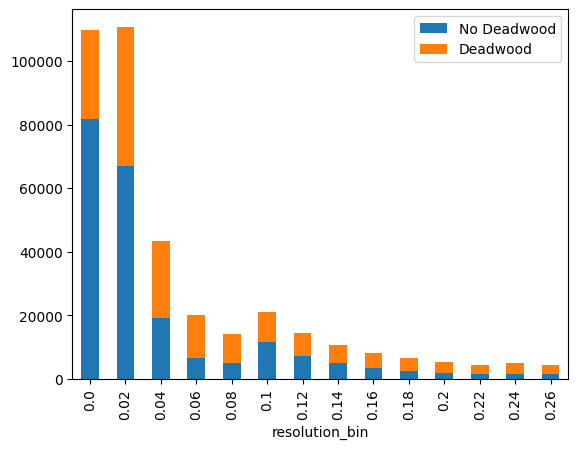

In [8]:
agg_res.plot.bar(x="resolution_bin", stacked=True, align="center")

In [9]:
agg_biome = df.groupby(["biome_group"])[["mask_filled"]].value_counts()
agg_biome = agg_biome.reset_index()
agg_biome = agg_biome.pivot(index='biome_group', columns='mask_filled', values='count').reset_index()#[["resolution_bin", "True", "False"]]
agg_biome.columns = ["biome_group", "No Deadwood", "Deadwood"]

order_dict = {'(Sub) Tropical':3, 'Boreal and Montane':1, 'Drylands':0, 'Temperate':2}

agg_biome = agg_biome.sort_values(by="biome_group", key=lambda x:x.map(order_dict))

agg_biome["biome_group"]

2              Drylands
1    Boreal and Montane
3             Temperate
0        (Sub) Tropical
Name: biome_group, dtype: object

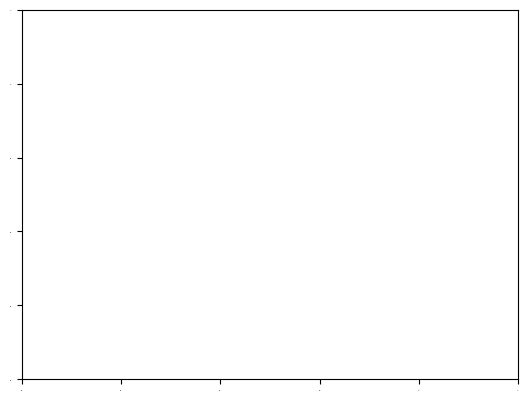

In [10]:
import matplotlib.pyplot as plt
fontsize = 8
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['font.size'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.tick_params(axis='both', labelsize=1)

[0.5 1.5 2.5 3.5]
          biome_group  No Deadwood  Deadwood
2            Drylands        15917     18970
1  Boreal and Montane         3374      4559
3           Temperate       181609    131504
0      (Sub) Tropical        14311      6779


/tmp/ipykernel_1718692/588797728.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


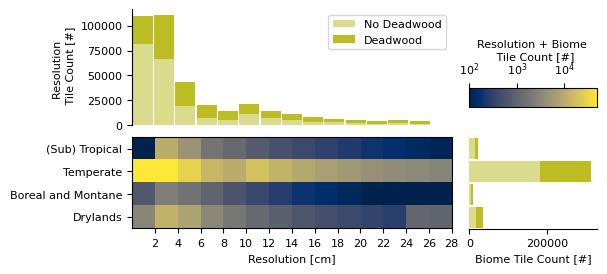

In [24]:
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.colors import SymLogNorm

x_edges = np.append(agg["x"].columns.values, [0])[:-2]
y_edges = np.flip(np.append(agg.index.values, ["0"]))[1:]
data = np.rot90(agg.to_numpy(), k=3)

fig = plt.figure(figsize=(6, 3))
gs = GridSpec(2, 2, width_ratios=(5,2), height_ratios=(1,1), wspace=0.08, hspace=0)

ax_heatmap = fig.add_subplot(gs[1:, :-1])
ax_top = fig.add_subplot(gs[0, :-1])
ax_right = fig.add_subplot(gs[1:, -1])
ax_topright = fig.add_subplot(gs[0,1])

# im = ax_heatmap.pcolormesh(x_edges, y_edges, data.T, cmap='viridis')
im = ax_heatmap.imshow(data.T, norm=SymLogNorm(linthresh=1, vmin=100, vmax=50000), cmap="cividis")

ax_heatmap.set_yticks(np.arange(4))
ax_heatmap.set_yticklabels(y_edges)

y_edges = np.arange(3)
x_edges = np.arange(0, 0.30, 0.2)

y_centers = np.arange(0.5, 4, 1)
x_centers = np.arange(0.01, 0.30, 0.02)

x_sum = np.nan_to_num(data.T, 0).sum(axis=0)
y_sum = np.nan_to_num(data.T, 0).sum(axis=1)

# print(x_sum)
# print(x_centers)
# print(y_sum)
print(y_centers)

# ax_top.bar(x_centers, x_sum, width=0.019, align="center", color="#98df8a")
# ax_right.barh(y_centers, np.flip(y_sum), height=0.93, align="center", color="#98df8a")

agg_res.plot.bar(x="resolution_bin", stacked=True, width=0.94, ax=ax_top, align="center",color={"Deadwood": "#bcbd22", "No Deadwood": "#dbdb8d"})

print(agg_biome)

agg_biome.plot.barh(x="biome_group", stacked=True, width=0.93, ax=ax_right, align="center", legend=False, color={"Deadwood": "#bcbd22", "No Deadwood": "#dbdb8d"})

ax_top.set_xlabel("")
ax_right.set_ylabel("")

ax_right.set_box_aspect(0.72)

# Set consistent limits
ax_top.set_xlim(-0.5, 14.5)
ax_right.set_ylim(-0.5, 3.5)

# Remove all spines and ticks
ax_top.spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)
# ax_top.spines['left'].set_visible(False)
ax_top.spines['bottom'].set_visible(False)
ax_top.set_xticks([])
# ax_top.set_yticks([])

ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_right.spines['left'].set_visible(False)
# ax_right.spines['bottom'].set_visible(False)
# ax_right.set_xticks([])
ax_right.set_yticks([])

ax_topright.spines['top'].set_visible(False)
ax_topright.spines['right'].set_visible(False)
ax_topright.spines['left'].set_visible(False)
ax_topright.spines['bottom'].set_visible(False)
ax_topright.set_xticks([])
ax_topright.set_yticks([])

ax_top.set_ylabel("Resolution \n Tile Count [#]")
ax_right.set_xlabel("Biome Tile Count [#]")
ax_heatmap.set_xticks(np.arange(0.5, 14, 1))
ax_heatmap.set_xticklabels(np.arange(2, 30, 2), rotation=0)
ax_heatmap.set_xlabel("Resolution [cm]")

# Add slim colorbar in top right
cbar_ax = fig.add_subplot(gs[0, -1])
cbar_ax.set_box_aspect(0.15)  # Make colorbar thinner
cbar = plt.colorbar(im, cax=cbar_ax, orientation='horizontal')
cbar.ax.set_title('Resolution + Biome \n Tile Count [#]', fontsize=8)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')
ax_topright.remove()

# Get current position
pos = cbar_ax.get_position()
# Move down by adjusting the y coordinate (reduce y0 and y1)
cbar_ax.set_position([pos.x0, pos.y0 - 0.1, pos.width, pos.height])

# Adjust title position
cbar.ax.set_title('Resolution + Biome \n Tile Count [#]', fontsize=8, pad=0)

fig.tight_layout()
fig.savefig("/net/home/cmosig/projects/standing-deadwood/plots/heatmap_tile_count.pdf", bbox_inches="tight")